In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sequencing_tools.viz_tools import color_encoder, okabeito_palette
from plotting_utils import label_sample
import re
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

In [25]:
tablename = '/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/non_template_added/clip_table.feather'
df = pd.read_feather(tablename) \
    .assign(base_fraction = lambda d: d.clipped_bases / d.bases * 100)\
    .assign(clip_aln = lambda d: d.softclip_count / d.aln_count * 100) \
    .assign(prep = lambda d: d.samplename.map(label_sample))
prep_encoder = color_encoder()
prep_encoder.fit(df.prep, okabeito_palette())
df.head()

,samplename,aln_count,softclip_count,bases,clipped_bases,base_fraction,clip_aln,prep
0,Qcf_Phos2_R1_001,1132617,709788,59540041,1350754,2.268648,62.667963,DNase I + Phosphatase
1,Qcf_All1_R1_001,10970336,5099199,689428296,8881947,1.288306,46.481703,Untreated
2,Qcf_Exo1_R1_001,850674,370910,45260399,684592,1.512563,43.601897,DNase I + Exo I
3,Qcf_NA2_R1_001,13619869,6600007,837848247,11815874,1.410264,48.458667,NaOH
4,Qcf4_R1_001,124254,70852,6057468,139397,2.301242,57.021907,DNase I


In [26]:
df.filter(regex= 'samplename|prep|base_fraction').sort_values('samplename')

,samplename,base_fraction,prep
8,QCF1_R1_001,2.392984,DNase I
22,QCF2_R1_001,2.538303,DNase I
14,Qcf10_R1_001,2.241991,DNase I
21,Qcf11_R1_001,2.369915,DNase I
9,Qcf12_R1_001,2.515045,DNase I
18,Qcf13_R1_001,2.467444,DNase I
4,Qcf4_R1_001,2.301242,DNase I
24,Qcf5_R1_001,2.303889,DNase I
28,Qcf6_SS_R1_001,2.392950,DNase I
29,Qcf7_R1_001,2.339704,DNase I


In [27]:
def plot_fraction(df, col, ax):
    sdf = df\
        .groupby('prep', as_index=False)\
        .agg({col:'median'})\
        .sort_values(col)
    order_prep = sdf.prep.unique()
    sns.swarmplot(data = df, 
              x = 'prep', 
              y = col, 
              order = order_prep,
              ax = ax,
              palette = [prep_encoder.encoder[p] for p in order_prep])
    xt = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

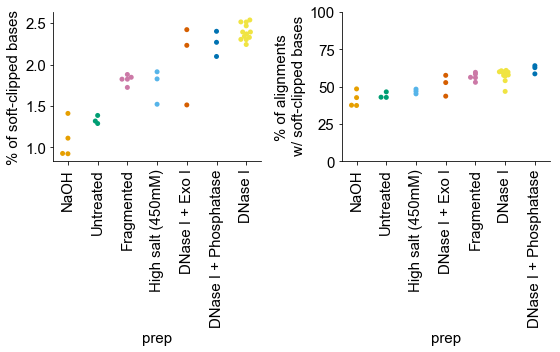

In [28]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(121)
plot_fraction(df, 'base_fraction' ,ax)
ax.set_ylabel('% of soft-clipped bases')

ax = fig.add_subplot(122)
plot_fraction(df,'clip_aln', ax)
ax.set_ylim(0,100)
ax.set_ylabel('% of alignments\n w/ soft-clipped bases')
fig.tight_layout()
sns.despine()

In [30]:
df.head()

,samplename,aln_count,softclip_count,bases,clipped_bases,base_fraction,clip_aln,prep
0,Qcf_Phos2_R1_001,1132617,709788,59540041,1350754,2.268648,62.667963,DNase I + Phosphatase
1,Qcf_All1_R1_001,10970336,5099199,689428296,8881947,1.288306,46.481703,Untreated
2,Qcf_Exo1_R1_001,850674,370910,45260399,684592,1.512563,43.601897,DNase I + Exo I
3,Qcf_NA2_R1_001,13619869,6600007,837848247,11815874,1.410264,48.458667,NaOH
4,Qcf4_R1_001,124254,70852,6057468,139397,2.301242,57.021907,DNase I


In [36]:
stat_table = '/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/mapping_stat.tsv'
sdf = pd.read_table(stat_table) \
    .assign(label = lambda d: d['samplename'].map(label_sample))\
    .merge(df\
            .filter(['base_fraction','samplename'])\
            .rename(columns={'base_fraction':'clipped base'}), 
           on ='samplename')
sdf

,samplename,trimmed,UniVec_contam,rRNA_mt,smallRNA,HISAT2,HISAT2_unique,BOWTIE2,BOWTIE2_unique,mapping_rate,label,clipped base
0,QCF1_R1_001,15573630.0,88493.0,4475657.0,6800296.0,200462.0,181915.0,455487.0,52738.0,0.770539,DNase I,2.392984
1,QCF2_R1_001,21375890.0,148408.0,6602142.0,8798492.0,251753.0,224741.0,600632.0,88568.0,0.765659,DNase I,2.538303
2,Qcf10_R1_001,12812031.0,16988.0,9430165.0,1960167.0,84242.0,73812.0,167120.0,51933.0,0.909860,DNase I,2.241991
3,Qcf11_R1_001,26303529.0,21389.0,16150557.0,8437984.0,69505.0,47044.0,295353.0,80104.0,0.949443,DNase I,2.369915
4,Qcf12_R1_001,15419412.0,17881.0,5672999.0,6500134.0,76486.0,55253.0,451000.0,67502.0,0.824634,DNase I,2.515045
5,Qcf13_R1_001,11196031.0,13802.0,3936122.0,4876370.0,56821.0,41472.0,333049.0,50295.0,0.822945,DNase I,2.467444
6,Qcf4_R1_001,10355972.0,7676.0,5606845.0,3055536.0,56297.0,42830.0,186685.0,36530.0,0.860563,DNase I,2.301242
7,Qcf5_R1_001,7034563.0,9281.0,3706923.0,2011471.0,42682.0,30745.0,174127.0,35629.0,0.844835,DNase I,2.303889
8,Qcf6_SS_R1_001,9025980.0,13077.0,5373993.0,2110675.0,95337.0,80182.0,191475.0,52567.0,0.862262,DNase I,2.392950
9,Qcf7_R1_001,11803521.0,4432.0,5883756.0,4529054.0,56012.0,47522.0,198851.0,37785.0,0.904110,DNase I,2.339704
